In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 128
num_classes = 10
epochs = 12

img_rows, img_cols = 28, 28

(x_train, y_train), (x_test, y_test) = mnist.load_data()


x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        fill_mode='nearest')


model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=x_train.shape[0] // batch_size,
                    validation_data=(x_test, y_test),
                    epochs=epochs, verbose=2)

score = model.evaluate(x_test, y_test, verbose=2)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


model.save('model.h5')

W0331 11:24:05.505836  2764 deprecation.py:506] From C:\Users\kimha\.conda\envs\tutorial\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Epoch 1/12
468/468 - 15s - loss: 1.1647 - acc: 0.6058 - val_loss: 0.2002 - val_acc: 0.9452
Epoch 2/12
468/468 - 11s - loss: 0.6140 - acc: 0.8067 - val_loss: 0.1419 - val_acc: 0.9588
Epoch 3/12
468/468 - 11s - loss: 0.4815 - acc: 0.8494 - val_loss: 0.1171 - val_acc: 0.9653
Epoch 4/12
468/468 - 11s - loss: 0.4107 - acc: 0.8746 - val_loss: 0.1086 - val_acc: 0.9665
Epoch 5/12
468/468 - 11s - loss: 0.3562 - acc: 0.8895 - val_loss: 0.0939 - val_acc: 0.9685
Epoch 6/12
468/468 - 11s - loss: 0.3325 - acc: 0.8986 - val_loss: 0.0806 - val_acc: 0.9742
Epoch 7/12
468/468 - 11s - loss: 0.3055 - acc: 0.9067 - val_loss: 0.0871 - val_acc: 0.9754
Epoch 8/12
468/468 - 11s - loss: 0.2847 - acc: 0.9140 - val_loss: 0.0778 - val_acc: 0.9753
Epoch 9/12
468/468 - 11s - loss: 0.2689 - acc: 0.9173 - val_loss: 0.0725 - val_acc: 0.9761
Epoch 10/12
468/468 - 11s - loss: 0.2640 - acc: 0.9199 - val_loss: 0.0639 - val_acc: 0.9788
Epoch 11/12
468/468 - 11s - loss: 0.2532 - acc: 0.9235 - val_loss: 0.0641 - val_acc: 0.97

In [1]:
import cv2 as cv
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

img_color = cv.imread('handwrite_num.jpg', cv.IMREAD_COLOR)
height, width, channel = img_color.shape
img_gray = cv.cvtColor(img_color, cv.COLOR_BGR2GRAY)
img_gray = cv.fastNlMeansDenoising(img_gray)
# ret,img_binary = cv.threshold(img_gray, 135, 255, cv.THRESH_BINARY_INV)
plt.imshow(img_gray, cmap='gray')

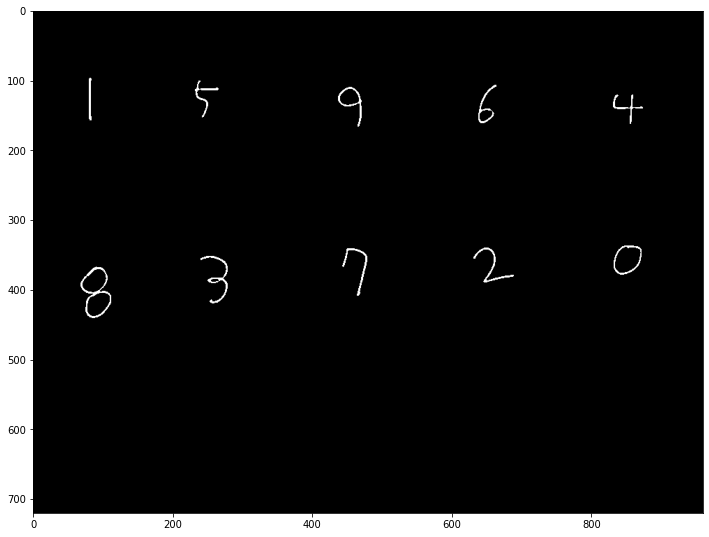

In [2]:
img_blurred = cv.GaussianBlur(img_gray, ksize=(5, 5), sigmaX=0)

img_thresh = cv.adaptiveThreshold(
    img_blurred, 
    maxValue=255.0, 
    adaptiveMethod=cv.ADAPTIVE_THRESH_GAUSSIAN_C, 
    thresholdType=cv.THRESH_BINARY_INV, 
    blockSize=19, 
    C=9
)

plt.figure(figsize=(12, 10))
plt.imshow(img_thresh, cmap='gray')

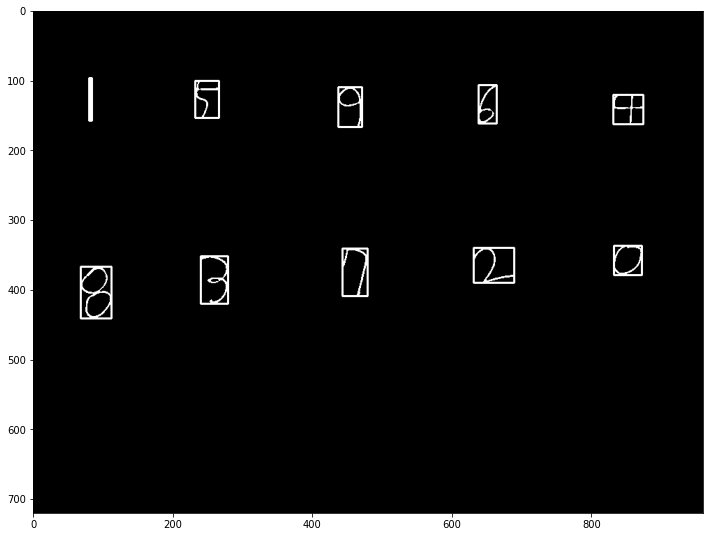

In [4]:
contours, hierarchy = cv.findContours(img_thresh, cv.RETR_EXTERNAL, 
                        cv.CHAIN_APPROX_SIMPLE)

temp_result = np.zeros((height, width, channel), dtype=np.uint8)
img_thresh_ = img_thresh.copy
for contour in contours:
    x, y, w, h = cv.boundingRect(contour)
    cv.rectangle(temp_result, pt1=(x, y), pt2=(x+w, y+h), color=(255, 255, 255), thickness=2)
    
plt.figure(figsize=(12, 10))
plt.imshow(temp_result, cmap='gray')

In [5]:
contours, hierarchy = cv.findContours(img_thresh, cv.RETR_EXTERNAL, 
                        cv.CHAIN_APPROX_SIMPLE)
for contour in contours:

    x, y, w, h = cv.boundingRect(contour)
    
    length = max(w, h) + 60
    img_digit = np.zeros((length, length, 1),np.uint8)

    new_x,new_y = x-(length - w)//2, y-(length - h)//2

    img_digit = img_thresh[new_y:new_y+length, new_x:new_x+length]

    kernel = np.ones((5, 5), np.uint8)
    img_digit = cv.morphologyEx(img_digit, cv.MORPH_DILATE, kernel)

#     cv.imshow('digit', img_digit)
#     cv.waitKey(0)

    model = load_model('model.h5')

    img_digit = cv.resize(img_digit, (28, 28), interpolation=cv.INTER_AREA)

    img_digit = img_digit / 255.0

    img_input = img_digit.reshape(1, 28, 28, 1)
    predictions = model.predict(img_input)

    number = np.argmax(predictions)
    print(number)

    cv.rectangle(img_color, (x, y), (x+w, y+h), (255, 255, 0), 2)

    location = (x + int(w *0.5), y - 10)
    font = cv.FONT_HERSHEY_COMPLEX  
    fontScale = 1.2
    cv.putText(img_color, str(number), location, font, fontScale, (0,255,0), 2)

#     cv.imshow('digit', img_digit)
#     cv.waitKey(0)
    
cv.imshow('result', img_color)
cv.waitKey(0)

8
3
7
2
0
4
9
6
5
1


-1